# GARCH Stock Forecasting

In [1]:
%pip install yfinance
%pip install pandas_datareader
%pip install setuptools
%pip install arch
%pip install statsmodels
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install tensorflow
%pip install openpyxl


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached lxml-5.4.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (3.5 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Using cached lxml-5.4.0-cp311-cp311-macosx_10_9_universal2.whl (8.1 MB)

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated 

## Read Data

In [2]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## DIS Volatility

In [3]:
start = datetime(2015, 1, 1)
end = datetime.today()

In [4]:
dis = web.DataReader('DIS', 'stooq', start=start, end=end)

In [5]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

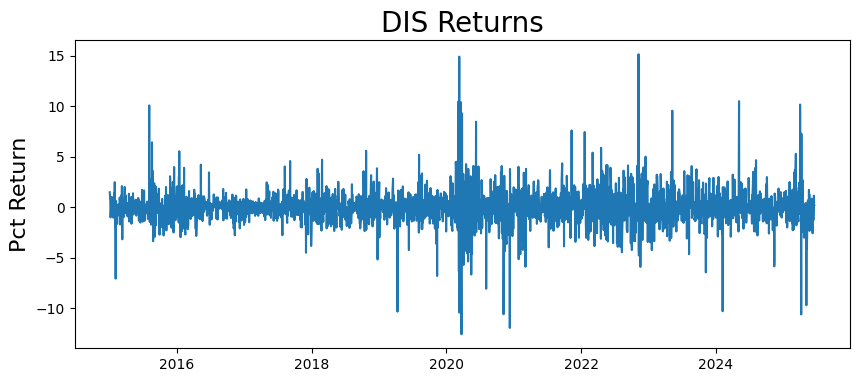

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

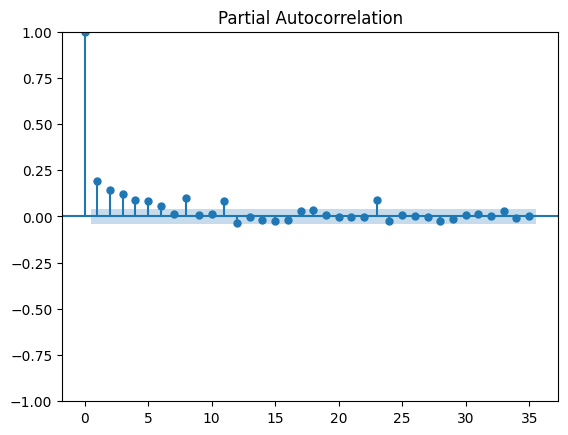

In [7]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [8]:
model = arch_model(returns, p=3, q=3)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 10949.530749797443
Iteration:      2,   Func. Count:     22,   Neg. LLF: 2972805.012004173
Iteration:      3,   Func. Count:     32,   Neg. LLF: 5108.832056395829
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5117.821887481748
Iteration:      5,   Func. Count:     54,   Neg. LLF: 5329.136707008945
Iteration:      6,   Func. Count:     64,   Neg. LLF: 4916.745633745191
Iteration:      7,   Func. Count:     74,   Neg. LLF: 5015.348938652012
Iteration:      8,   Func. Count:     84,   Neg. LLF: 4911.920460908383
Iteration:      9,   Func. Count:     94,   Neg. LLF: 4917.063857144183
Iteration:     10,   Func. Count:    104,   Neg. LLF: 4910.290549930511
Iteration:     11,   Func. Count:    114,   Neg. LLF: 4909.766528399717
Iteration:     12,   Func. Count:    124,   Neg. LLF: 4908.631999133071
Iteration:     13,   Func. Count:    133,   Neg. LLF: 4908.63023624539
Iteration:     14,   Func. Count:    142,   Neg. LLF: 4908.63013

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4908.63
Distribution:                  Normal   AIC:                           9833.26
Method:            Maximum Likelihood   BIC:                           9880.26
                                        No. Observations:                 2631
Date:                Sat, Jun 21 2025   Df Residuals:                     2630
Time:                        20:06:21   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.7964e-03  2.790e-02     -0.208      0.835 [-6.047e-02,4.888e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2395      0.117      2.040  4.134e-02 [9.414e-03,  0.470]
alpha[1]       0.3013      0.122      2.473  1.340e-02 [6.250e-02,  0.540]
alpha[2]       0.0404      0.185      0.218      0.827   [ -0.322,  0.403]
alpha[3]       0.0000      0.286      0.000      1.000   [ -0.560,  0.560]
beta[1]        0.0000      0.496      0.000      1.000   [ -0.972,  0.972]
beta[2]        0.3469      0.480      0.723      0.469   [ -0.593,  1.287]
beta[3]        0.2819      0.124      2.264  2.355e-02 [3.790e-02,  0.526]
==========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [11]:
model = arch_model(returns, p=3, q=0)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 10739.859186213871
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11836.614574572664
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1477432.2223535269
Iteration:      4,   Func. Count:     32,   Neg. LLF: 44053.48183418444
Iteration:      5,   Func. Count:     39,   Neg. LLF: 96456.21043859485
Iteration:      6,   Func. Count:     46,   Neg. LLF: 5152.493010636488
Iteration:      7,   Func. Count:     54,   Neg. LLF: 20676.151429783855
Iteration:      8,   Func. Count:     61,   Neg. LLF: 4957.952842619687
Iteration:      9,   Func. Count:     67,   Neg. LLF: 4957.210163721285
Iteration:     10,   Func. Count:     73,   Neg. LLF: 4957.1407329471795
Iteration:     11,   Func. Count:     79,   Neg. LLF: 4957.138146883908
Iteration:     12,   Func. Count:     85,   Neg. LLF: 4957.137879410286
Iteration:     13,   Func. Count:     91,   Neg. LLF: 4957.137857944047
Iteration:     14,   Func. Count:     97,   Neg. LLF: 4957.

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4957.14
Distribution:                  Normal   AIC:                           9924.28
Method:            Maximum Likelihood   BIC:                           9953.65
                                        No. Observations:                 2631
Date:                Sat, Jun 21 2025   Df Residuals:                     2630
Time:                        20:06:21   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0159  3.012e-02     -0.529      0.597 [-7.498e-02,4.311e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.3582      0.188      7.223  5.078e-13   [  0.990,  1.727]
alpha[1]       0.3581  8.390e-02      4.268  1.968e-05   [  0.194,  0.523]
alpha[2]       0.1676  6.357e-02      2.637  8.360e-03 [4.305e-02,  0.292]
alpha[3]       0.1342  6.303e-02      2.130  3.318e-02 [1.071e-02,  0.258]
==========================================================================

Covariance estimator: robust
"""

In [14]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [15]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

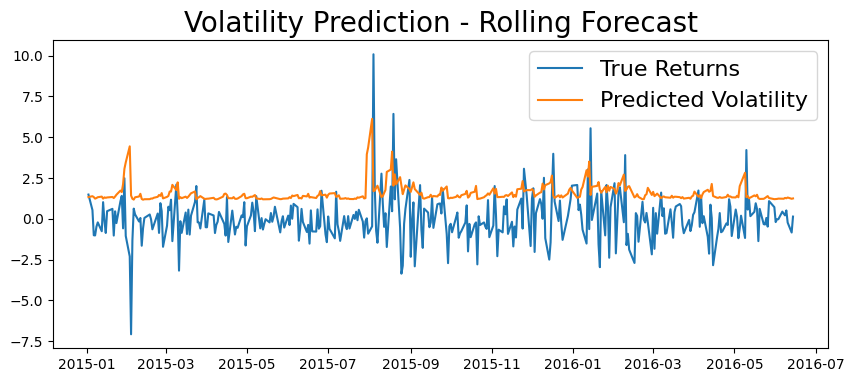

In [16]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [17]:
start = datetime(2000, 1, 1)
end = datetime(2025,6,20)

In [18]:
spy = web.DataReader('SPY', 'stooq', start=start, end=end)

In [19]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

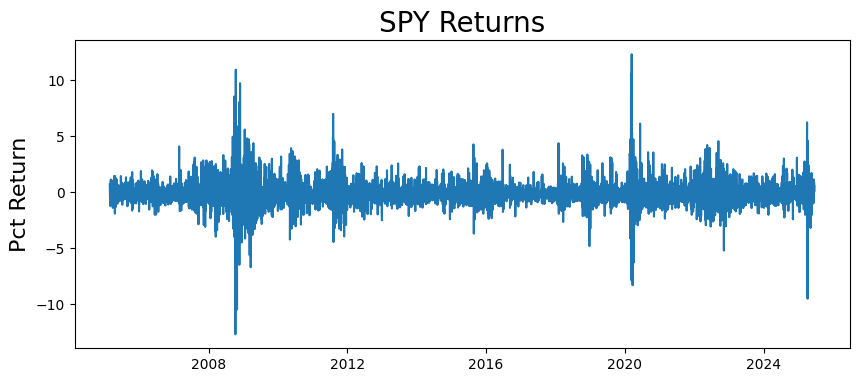

In [20]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

In [21]:
# Rolling 22-day volatility (not annualized)
volatility = returns.rolling(window=22).std().dropna()

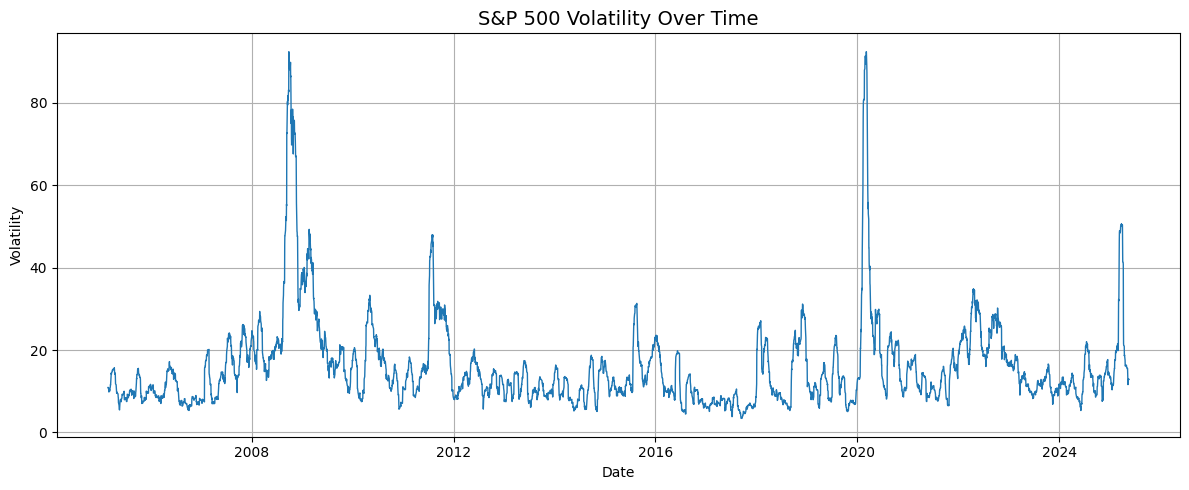

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(volatility*math.sqrt(252), linewidth=1)
plt.title('S&P 500 Volatility Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

## PACF

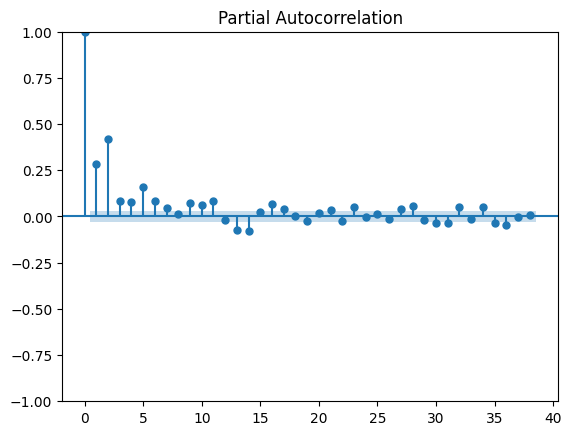

In [23]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [24]:
model = arch_model(returns, p=2, q=2)

In [25]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 50990.488406904595
Iteration:      2,   Func. Count:     21,   Neg. LLF: 8280958.507157184
Iteration:      3,   Func. Count:     30,   Neg. LLF: 8196.205410918834
Iteration:      4,   Func. Count:     39,   Neg. LLF: 11745.58417319816
Iteration:      5,   Func. Count:     49,   Neg. LLF: 8969.833729629405
Iteration:      6,   Func. Count:     58,   Neg. LLF: 6819.251471118601
Iteration:      7,   Func. Count:     66,   Neg. LLF: 6857.3563798727355
Iteration:      8,   Func. Count:     74,   Neg. LLF: 6801.769274416505
Iteration:      9,   Func. Count:     81,   Neg. LLF: 6831.080440029871
Iteration:     10,   Func. Count:     89,   Neg. LLF: 6801.979105460978
Iteration:     11,   Func. Count:     97,   Neg. LLF: 6801.197102739178
Iteration:     12,   Func. Count:    104,   Neg. LLF: 6801.194768111611
Iteration:     13,   Func. Count:    111,   Neg. LLF: 6801.194687963531
Iteration:     14,   Func. Count:    118,   Neg. LLF: 6801.194

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6801.19
Distribution:                  Normal   AIC:                           13614.4
Method:            Maximum Likelihood   BIC:                           13653.6
                                        No. Observations:                 5110
Date:                Sat, Jun 21 2025   Df Residuals:                     5109
Time:                        20:06:27   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.0807  1.036e-02     -7.785  6.993e-15 [ -0.101,-6.036e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0295  7.823e-03      3.776  1.596e-04 [1.421e-02,4.487e-02]
alpha[1]       0.0674  2.253e-02      2.992  2.771e-03   [2.326e-02,  0.112]
alpha[2]       0.1145  3.660e-02      3.128  1.758e-03   [4.277e-02,  0.186]
beta[1]        0.8016      0.238      3.374  7.404e-04     [  0.336,  1.267]
beta[2]    6.5216e-17      0.199  3.278e-16      1.000     [ -0.390,  0.390]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [27]:
print(len(returns))
print(len(volatility))


5110
5089


In [28]:
rolling_predictions = []
test_size = len(volatility) - 1

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [29]:
# # Keep the last 5 years of returns (from ~2018 to 2025)
# returns_recent = returns[returns.index >= '2020-01-01']
# test_size = len(returns_recent)

# rolling_predictions = []

# for i in range(test_size):
#     train = returns.iloc[:-(test_size - i)]
#     model = arch_model(train, p=2, q=2)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1)
#     rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

In [30]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-(test_size):])
# rolling_predictions = pd.Series(rolling_predictions, index=returns_recent.index)


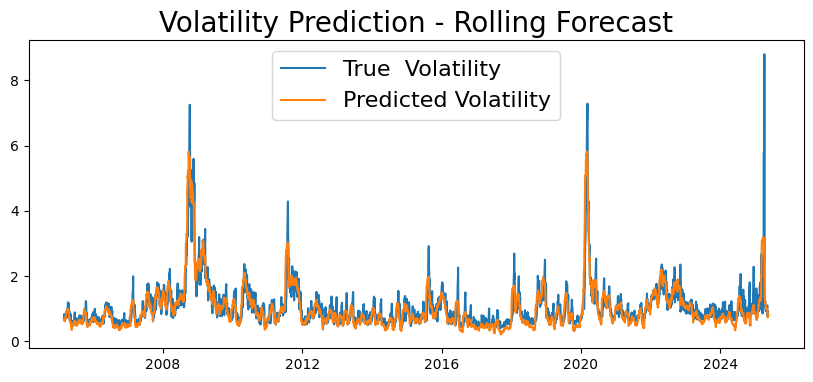

In [31]:
plt.figure(figsize=(10,4))
preds, = plt.plot(rolling_predictions)
true, = plt.plot(volatility)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True  Volatility', 'Predicted Volatility'], fontsize=16)

# # Plot
# plt.figure(figsize=(12, 5))
# plt.plot(returns_recent, label='True Returns')
# plt.plot(rolling_predictions, label='Predicted Volatility')
# plt.title('Volatility Prediction (2018–2025)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# How to use the model

In [32]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [33]:
pred = model_fit.forecast(horizon=8)
future_dates = [returns.index[-len(volatility)] + timedelta(days=i) for i in range(1,9)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

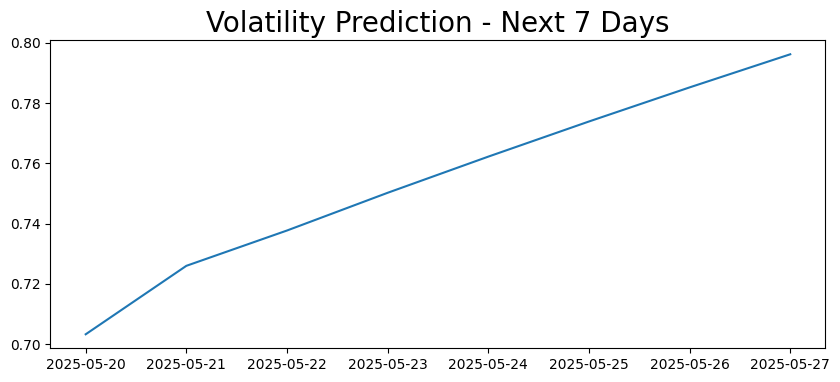

In [34]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

# LSTM-GARCH model.

Epoch 1/20


/Users/crishuynh/Documents/Spurs/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


254/254 - 1s - 5ms/step - loss: 0.0020
Epoch 2/20
254/254 - 1s - 2ms/step - loss: 5.0642e-04
Epoch 3/20
254/254 - 1s - 2ms/step - loss: 4.0676e-04
Epoch 4/20
254/254 - 1s - 2ms/step - loss: 3.4770e-04
Epoch 5/20
254/254 - 1s - 2ms/step - loss: 3.0073e-04
Epoch 6/20
254/254 - 1s - 2ms/step - loss: 2.6416e-04
Epoch 7/20
254/254 - 1s - 2ms/step - loss: 2.3677e-04
Epoch 8/20
254/254 - 1s - 2ms/step - loss: 2.1456e-04
Epoch 9/20
254/254 - 1s - 2ms/step - loss: 1.9640e-04
Epoch 10/20
254/254 - 1s - 2ms/step - loss: 1.8286e-04
Epoch 11/20
254/254 - 1s - 2ms/step - loss: 1.7313e-04
Epoch 12/20
254/254 - 1s - 2ms/step - loss: 1.6606e-04
Epoch 13/20
254/254 - 1s - 2ms/step - loss: 1.6095e-04
Epoch 14/20
254/254 - 1s - 2ms/step - loss: 1.5728e-04
Epoch 15/20
254/254 - 1s - 2ms/step - loss: 1.5465e-04
Epoch 16/20
254/254 - 1s - 3ms/step - loss: 1.5277e-04
Epoch 17/20
254/254 - 1s - 2ms/step - loss: 1.5145e-04
Epoch 18/20
254/254 - 1s - 2ms/step - loss: 1.5054e-04
Epoch 19/20
254/254 - 1s - 2ms/ste

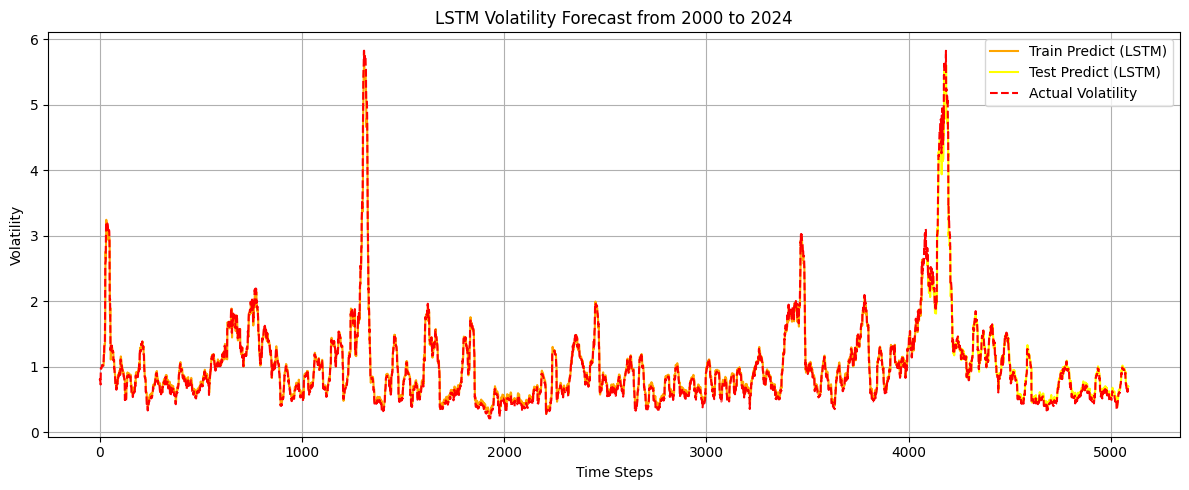

In [35]:
# LSTM for international airline passengers problem with time step regression framing
# Set seed for reproducibility
tf.random.set_seed(7)

# === STEP 2: Normalize ===
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = volatility.values.reshape(-1, 1).astype('float32')
dataset_scaled = scaler.fit_transform(dataset)

# === STEP 3: Create Dataset Function ===
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# === STEP 4: Train/test split ===
train_size = int(len(dataset_scaled) * 0.8)
test_size = len(dataset_scaled) - train_size
train, test = dataset_scaled[0:train_size], dataset_scaled[train_size:]

look_back = 20  # use past 20 days
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# === STEP 5: Reshape for LSTM input ===
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# === STEP 6: Build and Train Model ===
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=16, verbose=2)

# === STEP 7: Make Predictions ===
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# === STEP 8: Invert scaling ===
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))

# === STEP 9: Calculate RMSE ===
trainScore = np.sqrt(mean_squared_error(trainY_inv, trainPredict))
testScore = np.sqrt(mean_squared_error(testY_inv, testPredict))
print('Train Score: %.4f RMSE' % trainScore)
print('Test Score: %.4f RMSE' % testScore)

# === STEP 10: Create aligned plot ===
trainPredictPlot = np.empty_like(dataset_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, 0] = trainPredict[:, 0]

testPredictPlot = np.empty_like(dataset_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset_scaled) - 1, 0] = testPredict[:, 0]

# === STEP 11: Final Plot ===
plt.figure(figsize=(12, 5))
plt.plot(trainPredictPlot, label='Train Predict (LSTM)', color='orange')
plt.plot(testPredictPlot, label='Test Predict (LSTM)', color='yellow')
plt.plot(scaler.inverse_transform(dataset_scaled), label='Actual Volatility', color='red', linestyle='--')
plt.title('LSTM Volatility Forecast from 2000 to 2024')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/crishuynh/Documents/Spurs/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


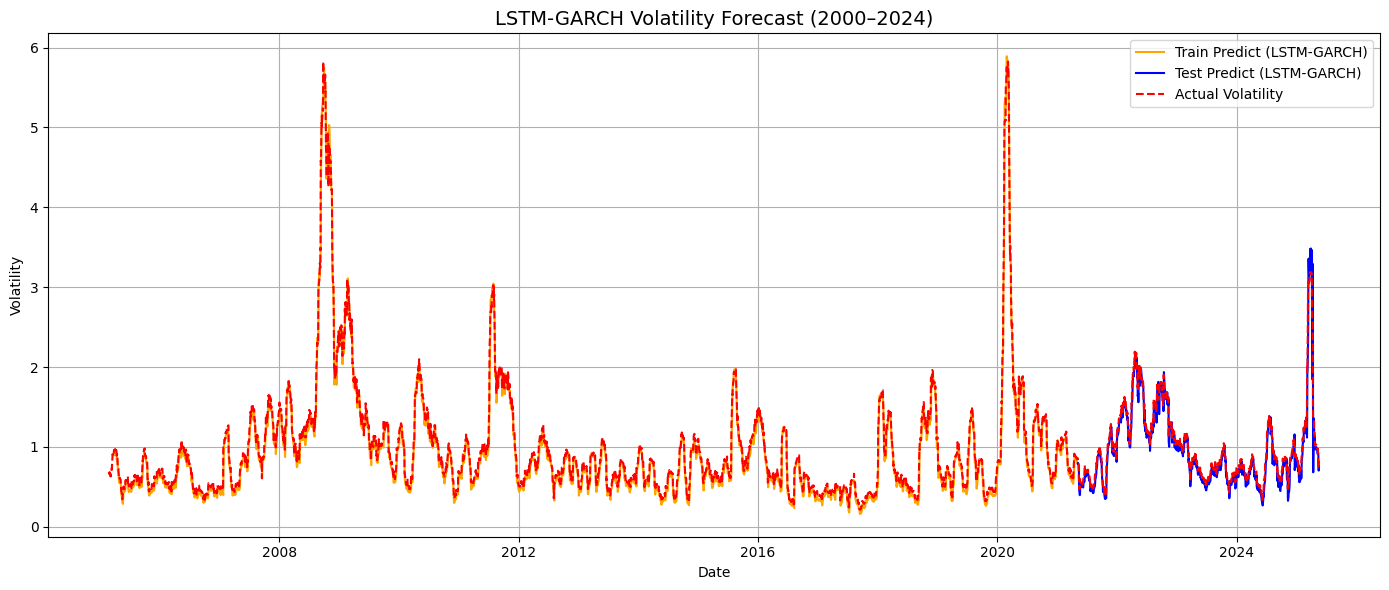

In [38]:
# === Step 1: Merge input data ===
# Assumes returns, volatility, predicted_vol already defined for 2000–2024
hybrid_df = pd.concat([
    returns.rename("log_return"),
    volatility.shift(1).rename("lagged_vol"),
    rolling_predictions.rename("garch_forecast"),
    volatility.rename("target_vol")
], axis=1).dropna()

# === Step 2: Normalize data ===
scaler = MinMaxScaler()
scaled = scaler.fit_transform(hybrid_df)

# === Step 3: Create dataset ===
def create_dataset(data, look_back=20):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back, 1])  # column 1 = lagged_vol (target_vol)
    return np.array(X), np.array(y)

look_back = 20
X, y = create_dataset(scaled, look_back)

# === Step 4: Split into train/test ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === Step 5: Reshape input ===
X_train = X_train.reshape(X_train.shape[0], look_back, X.shape[2])
X_test = X_test.reshape(X_test.shape[0], look_back, X.shape[2])

# === Step 6: Build and train LSTM ===
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

# === Step 7: Predict and inverse scale ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

scaler_y = MinMaxScaler()
scaler_y.min_, scaler_y.scale_ = scaler.min_[1], scaler.scale_[1]
train_pred_inv = scaler_y.inverse_transform(y_train_pred)
test_pred_inv = scaler_y.inverse_transform(y_test_pred)
y_train_inv = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# === Step 8: Rebuild full timeline ===
full_index = hybrid_df.index[look_back + 1:]
train_pred_series = pd.Series(train_pred_inv.flatten(), index=full_index[:split])
test_pred_series = pd.Series(test_pred_inv.flatten(), index=full_index[split:])


# === Step 9: Plot — Train + Test Combined ===
plt.figure(figsize=(14, 6))
plt.plot(train_pred_series, label='Train Predict (LSTM-GARCH)', color='orange')
plt.plot(test_pred_series, label='Test Predict (LSTM-GARCH)', color='blue')
plt.plot(volatility, label='Actual Volatility', linestyle='--', color='red')
plt.title('LSTM-GARCH Volatility Forecast (2000–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


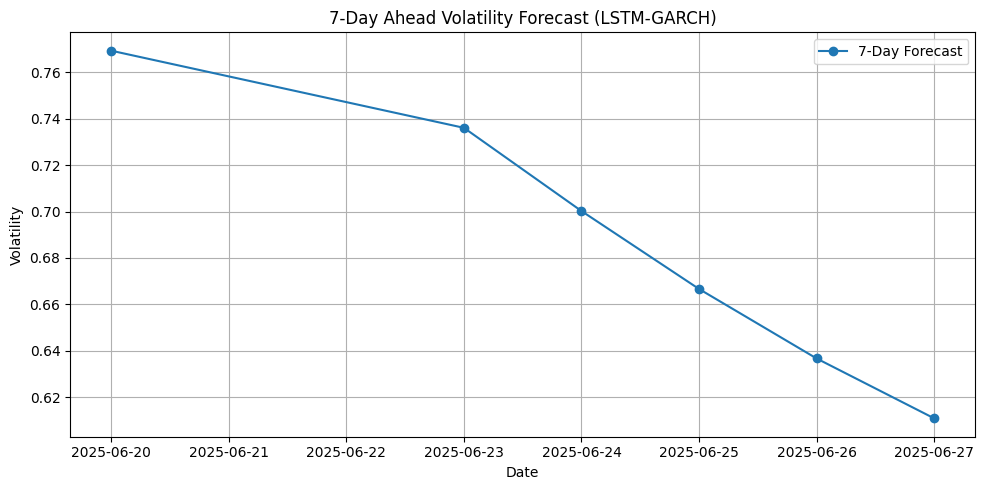

2025-06-20    0.769314
2025-06-23    0.736085
2025-06-24    0.700231
2025-06-25    0.666649
2025-06-26    0.636713
2025-06-27    0.610913
Freq: B, dtype: float32


In [39]:
# === STEP 1: Get last input sequence from your full dataset ===
last_seq = scaled[-look_back:]
input_seq = last_seq.copy()
future_scaled = []

# === STEP 2: Forecast next 7 steps using trained model ===
for _ in range(6):
    pred = model.predict(input_seq.reshape(1, look_back, X.shape[2]), verbose=0)
    future_scaled.append(pred[0, 0])

    # Prepare next input by shifting and inserting prediction
    next_step = input_seq[-1].copy()
    next_step[1] = pred[0, 0]  # update lagged_vol
    input_seq = np.append(input_seq[1:], [next_step], axis=0)

# === STEP 3: Inverse transform forecast ===
scaler_y = MinMaxScaler()
scaler_y.min_, scaler_y.scale_ = scaler.min_[3], scaler.scale_[3]  # column 3 = target_vol
forecast = scaler_y.inverse_transform(np.array(future_scaled).reshape(-1, 1)).flatten()

# === STEP 4: Create future index ===
last_date = hybrid_df.index[-1]
forecast_dates = pd.bdate_range(start='2025-06-20', periods=6)
forecast_series = pd.Series(forecast, index=forecast_dates)

# === STEP 5: Plot forecast ===
plt.figure(figsize=(10, 5))
plt.plot(forecast_series, marker='o', label='7-Day Forecast')
plt.title('7-Day Ahead Volatility Forecast (LSTM-GARCH)')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print forecast
print(forecast_series)